## Preprocessing du Dataset Heart et Modelisation

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,classification_report
import matplotlib.pyplot  as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
#Chargement du Dataset
df = pd.read_excel('../dataset/Heart.xlsx')

In [3]:
df.head()

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0


In [4]:
df["PENTE"].value_counts()

Plat          460
Ascendant     395
Descendant     63
Name: PENTE, dtype: int64

### Encodage des variables Qualitatives

In [5]:
#Encodage
df['SEXE'] = df['SEXE'].map({"homme":1,"femme":0})
df['TDT'] = df['TDT'].map({'ASY':0,'DNA':1,'AA':2,'AT':3})
df['ECG'] = df['ECG'].map({'Normal':0,'LVH':1,'ST':2})
df['ANGINE'] = df['ANGINE'].map({'Oui':0,'Non':1})
df['PENTE'] = df['PENTE'].map({'Plat':0,'Ascendant':1,'Descendant':2})
df.rename({'DEPRESSION ':'DEPRESSION'},inplace=True)

In [6]:
df.head()

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,1,2,140,289,0,0,172,1,0.0,1,0
1,49,0,1,160,180,0,0,156,1,1.0,0,1
2,37,1,2,130,283,0,2,98,1,0.0,1,0
3,48,0,0,138,214,0,0,108,0,1.5,0,1
4,54,1,1,150,195,0,0,122,1,0.0,1,0


### Construction de modèle Sans Traitement des Variables

In [7]:
y1 = df['CŒUR']
dat = df.drop('CŒUR',axis=1)

In [8]:
x1_train,x1_test,y1_train,y1_test = train_test_split(dat,y1,test_size=0.2,random_state=10)

### Modelisation

- Modele de regression Logistique

In [9]:
# Instanciation et Entrainement du modele
lr = LogisticRegression(random_state=10)
lr.fit(x1_train,y1_train)

LogisticRegression(random_state=10)

In [10]:
#Performance du modele sur les données d'entrainement
trainScore = lr.score(x1_train,y1_train)
trainScore

0.8664850136239782

In [11]:
#Performance du modele sur les données de test
testScore = lr.score(x1_test,y1_test)
testScore

0.8315217391304348

In [12]:
#Prediction 

### Normalisation des Variables quantitatives

In [13]:
quant_cols = ['AGE','PAR','CHOLESTEROL','FCMAX','DEPRESSION ']

In [14]:
normalizer = StandardScaler()
df[quant_cols] = normalizer.fit_transform(df[quant_cols].values)

In [15]:
y = df['CŒUR']
data = df.drop('CŒUR',axis=1)

In [16]:
x_train,x_test,y_train,y_test = train_test_split(data,y,test_size=0.2,random_state=10)

### Modelisation

- Modele de Regression Logistique

In [17]:
#Instanciation du modele
ml = LogisticRegression(random_state=10)

In [18]:
#Entrainement du modele
ml.fit(x_train,y_train)

LogisticRegression(random_state=10)

In [19]:
#Performance du modele sur le jeu de donné d'entrainement
train_score = ml.score(x_train,y_train)
train_score

0.8678474114441417

In [20]:
#Performance du modele sur le jeu de donnée de test
test_score = ml.score(x_test,y_test)
test_score

0.842391304347826

In [21]:
#Prediction du model
y_pred = ml.predict(x_test)

In [22]:
#Visualisation du rapport de Classification
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83        86
           1       0.84      0.87      0.85        98

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



In [23]:
#Matrice de confusion
conf_matrix = pd.DataFrame(confusion_matrix(y_test,y_pred))
conf_matrix.columns = ['Absence','Présence']
conf_matrix.index = ['Absence','Présence']
conf_matrix

,Absence,Présence
Absence,70,16
Présence,13,85


- 

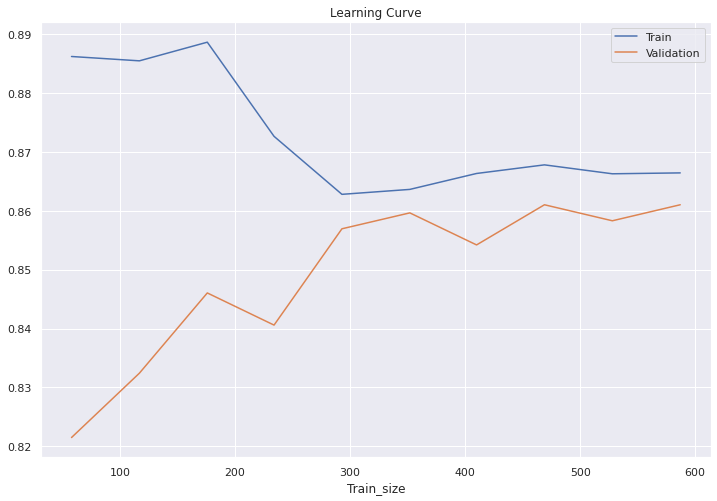

In [24]:
var, train_score, val_score = learning_curve(ml,x_train, y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5)
plt.figure(figsize=(12,8))
plt.title('Learning Curve')
plt.plot(var, train_score.mean(axis = 1), label = 'Train')
plt.plot(var, val_score.mean(axis = 1), label = 'Validation')
plt.xlabel('Train_size')
plt.legend()
plt.show()

 - Modele des KMEANS

In [93]:
#Recherche du meilleur paramètre pour le modèle de KNeams
for i in range(1,10):
    kmeans = KNeighborsClassifier(n_neighbors=i)
    kmeans.fit(x_train,y_train)
    print(f'{i} : TEST_SCORE ==>{kmeans.score(x_train,y_train)} | TRAIN_SCORE ==>{kmeans.score(x_test,y_test)}')

1 : TEST_SCORE ==>1.0 | TRAIN_SCORE ==>0.7663043478260869
2 : TEST_SCORE ==>0.9046321525885559 | TRAIN_SCORE ==>0.7445652173913043
3 : TEST_SCORE ==>0.896457765667575 | TRAIN_SCORE ==>0.8260869565217391
4 : TEST_SCORE ==>0.8841961852861036 | TRAIN_SCORE ==>0.8043478260869565
5 : TEST_SCORE ==>0.888283378746594 | TRAIN_SCORE ==>0.8152173913043478
6 : TEST_SCORE ==>0.8787465940054496 | TRAIN_SCORE ==>0.8369565217391305
7 : TEST_SCORE ==>0.8841961852861036 | TRAIN_SCORE ==>0.8369565217391305
8 : TEST_SCORE ==>0.8760217983651226 | TRAIN_SCORE ==>0.8369565217391305
9 : TEST_SCORE ==>0.8773841961852861 | TRAIN_SCORE ==>0.8315217391304348


In [ ]:
km = KNeighborsClassifier(n_neighbors=5)